In [40]:
from tensorflow.keras.datasets import imdb

In [41]:
vocab_size = 8000
(X_train, y_train), (X_test, y_test) = imdb.load_data(
    num_words=vocab_size
)

In [42]:
print(type(X_test))

<class 'numpy.ndarray'>


In [43]:
print(type(X_train[5]))

<class 'list'>


In [44]:
print(X_train[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


In [45]:
maxlen = 200

In [46]:
from tensorflow.keras import preprocessing
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24 

Building and training an RNN model for sentiment classification

In [47]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, \
    Flatten, SpatialDropout1D, Dropout
    
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, output_dim=32))
model_rnn.add(SpatialDropout1D(0.4))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.4))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_5 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 258,113
Trainable params: 258,113
Non-trainable params: 0
________________________________________________

In [49]:
model_rnn.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop', metrics=['accuracy'])

In [50]:
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 8s 42ms/step - loss: 0.5901 - accuracy: 0.6830 - val_loss: 0.4262 - val_accuracy: 0.8162
Epoch 2/10
157/157 [==============================] - 7s 42ms/step - loss: 0.4071 - accuracy: 0.8310 - val_loss: 0.3553 - val_accuracy: 0.8538
Epoch 3/10
157/157 [==============================] - 6s 41ms/step - loss: 0.3444 - accuracy: 0.8626 - val_loss: 0.3696 - val_accuracy: 0.8534
Epoch 4/10
157/157 [==============================] - 6s 41ms/step - loss: 0.3066 - accuracy: 0.8805 - val_loss: 0.3802 - val_accuracy: 0.8318
Epoch 5/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2788 - accuracy: 0.8932 - val_loss: 0.3458 - val_accuracy: 0.8638
Epoch 6/10
157/157 [==============================] - 6s 41ms/step - loss: 0.2609 - accuracy: 0.9002 - val_loss: 0.3288 - val_accuracy: 0.8668
Epoch 7/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2439 - accuracy: 0.9089 - val_loss: 0.5605 - val_accuracy: 0.8216

In [51]:
y_test_pred = (model_rnn.predict(X_test) > 0.5).astype('int32')
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.86084


In [52]:
inp_review = "An excellent movie!"

In [53]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [54]:
text_to_word_sequence(inp_review)

['an', 'excellent', 'movie']

In [55]:
word_map = imdb.get_word_index()

In [56]:
vocab_map = dict(
    sorted(word_map.items(), key=lambda x: x[1])[:vocab_size]
)

In [57]:
def preprocess(review):
  inp_tokens = text_to_word_sequence(review)
  seq = []
  for token in inp_tokens:
    seq.append(vocab_map.get(token))
  return seq

In [58]:
preprocess(inp_review)

[32, 318, 17]

In [59]:
(model_rnn.predict([preprocess(inp_review)]) > 0.5).astype('int32')

array([[1]], dtype=int32)

In [60]:
inp_review = "Don't watch this movie"\
 " - poor acting, poor script, bad direction."

In [61]:
(model_rnn.predict([preprocess(inp_review)]) > 0.5).astype('int32')

array([[0]], dtype=int32)

LSTM-Based Sentiment classification model

In [62]:
from tensorflow.keras.layers import LSTM

In [63]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, output_dim=32))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(
    1, activation='sigmoid'
))
model_lstm.compile(
    loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']
)
model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 264,353
Trainable params: 264,353
Non-trainable params: 0
________________________________________________

In [64]:
history_lstm = model_lstm.fit(
    X_train, y_train, batch_size=128, validation_split=0.2, epochs=5
)

Epoch 1/5
157/157 [==============================] - 17s 96ms/step - loss: 0.5295 - accuracy: 0.7319 - val_loss: 0.4293 - val_accuracy: 0.8090
Epoch 2/5
157/157 [==============================] - 15s 94ms/step - loss: 0.3304 - accuracy: 0.8673 - val_loss: 0.3494 - val_accuracy: 0.8548
Epoch 3/5
157/157 [==============================] - 15s 94ms/step - loss: 0.2705 - accuracy: 0.8953 - val_loss: 0.2799 - val_accuracy: 0.8838
Epoch 4/5
157/157 [==============================] - 15s 94ms/step - loss: 0.2398 - accuracy: 0.9115 - val_loss: 0.3199 - val_accuracy: 0.8802
Epoch 5/5
157/157 [==============================] - 15s 94ms/step - loss: 0.2177 - accuracy: 0.9165 - val_loss: 0.3048 - val_accuracy: 0.8850


In [65]:
y_test_pred = (model_lstm.predict(X_test) > 0.5).astype('int32')
print(accuracy_score(y_test, y_test_pred))

0.87404


In [66]:
from tensorflow.keras.layers import GRU

In [67]:
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, output_dim=32))
model_gru.add(SpatialDropout1D(0.4))
model_gru.add(GRU(32, reset_after=False))
model_gru.add(Dropout(0.4))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 gru_1 (GRU)                 (None, 32)                6240      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 262,273
Trainable params: 262,273
Non-trainable params: 0
________________________________________________

In [68]:
history_gru = model_gru.fit(
    X_train, y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=4
)

Epoch 1/4
157/157 [==============================] - 17s 97ms/step - loss: 0.5636 - accuracy: 0.6888 - val_loss: 0.3922 - val_accuracy: 0.8392
Epoch 2/4
157/157 [==============================] - 15s 96ms/step - loss: 0.3365 - accuracy: 0.8586 - val_loss: 0.3387 - val_accuracy: 0.8564
Epoch 3/4
157/157 [==============================] - 15s 96ms/step - loss: 0.2795 - accuracy: 0.8895 - val_loss: 0.3105 - val_accuracy: 0.8740
Epoch 4/4
157/157 [==============================] - 15s 96ms/step - loss: 0.2472 - accuracy: 0.9056 - val_loss: 0.3726 - val_accuracy: 0.8486


In [69]:
y_test_pred = (model_gru.predict(X_test) > 0.5).astype('int32')
print(accuracy_score(y_test, y_test_pred))

0.83652


In [70]:
from tensorflow.keras.layers import Bidirectional

In [71]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(vocab_size, output_dim=32))
model_bilstm.add(SpatialDropout1D(0.4))
model_bilstm.add(Bidirectional(LSTM(32)))
model_bilstm.add(Dropout(0.4))
model_bilstm.add(Dense(1, activation='sigmoid'))
model_bilstm.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop', metrics=['accuracy']
)
model_bilstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 272,705
Trainable params: 272,705
Non-tr

In [72]:
history_bilstm = model_bilstm.fit(
    X_train, y_train, batch_size=128, validation_split=0.2,
    epochs=4
)

Epoch 1/4
157/157 [==============================] - 30s 176ms/step - loss: 0.5595 - accuracy: 0.7092 - val_loss: 0.4276 - val_accuracy: 0.8234
Epoch 2/4
157/157 [==============================] - 27s 172ms/step - loss: 0.3386 - accuracy: 0.8676 - val_loss: 0.3425 - val_accuracy: 0.8572
Epoch 3/4
157/157 [==============================] - 27s 171ms/step - loss: 0.2728 - accuracy: 0.8938 - val_loss: 0.3041 - val_accuracy: 0.8700
Epoch 4/4
157/157 [==============================] - 27s 171ms/step - loss: 0.2443 - accuracy: 0.9084 - val_loss: 0.3036 - val_accuracy: 0.8840


In [73]:
y_test_pred = (model_bilstm.predict(X_test) > 0.5).astype('int32')
accuracy_score(y_test, y_test_pred)

0.87608

Stacked LSTM-Based Sentiment Classification Model

In [74]:
model_stack = Sequential()
model_stack.add(Embedding(vocab_size, output_dim=32))
model_stack.add(SpatialDropout1D(0.4))

In [75]:
model_stack.add(LSTM(32, return_sequences=True))
model_stack.add(LSTM(32, return_sequences=False))
model_stack.add(Dropout(0.5))
model_stack.add(Dense(1, activation='sigmoid'))
model_stack.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_stack.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          256000    
                                                                 
 spatial_dropout1d_9 (Spatia  (None, None, 32)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                      

In [76]:
history_stack = model_stack.fit(
    X_train, y_train, batch_size=128, validation_split=0.2, epochs=4
)

Epoch 1/4
157/157 [==============================] - 32s 184ms/step - loss: 0.5183 - accuracy: 0.7315 - val_loss: 0.3603 - val_accuracy: 0.8500
Epoch 2/4
157/157 [==============================] - 28s 177ms/step - loss: 0.3346 - accuracy: 0.8651 - val_loss: 0.3283 - val_accuracy: 0.8734
Epoch 3/4
157/157 [==============================] - 28s 178ms/step - loss: 0.2704 - accuracy: 0.8959 - val_loss: 0.2857 - val_accuracy: 0.8888
Epoch 4/4
157/157 [==============================] - 28s 178ms/step - loss: 0.2420 - accuracy: 0.9105 - val_loss: 0.2946 - val_accuracy: 0.8862


In [77]:
y_test_pred = (model_stack.predict(X_test) > 0.5).astype('int32')
accuracy_score(y_test, y_test_pred)

0.8766

Sentiment Analysis of Amazon Product Reviews

In [79]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [80]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
Amazon_reviews_test = 'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-Workshop/master/Chapter06/Datasets/Activity6.01/Amazon_reviews_test.csv'
Amazon_reviews_train = 'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-Workshop/master/Chapter06/Datasets/Activity6.01/Amazon_reviews_train.csv'

In [82]:
train_df = pd.read_csv(Amazon_reviews_train)
test_df = pd.read_csv(Amazon_reviews_test)

In [83]:
print(train_df.shape, train_df.shape)
train_df.head(5)

(25000, 2) (25000, 2)


,review_text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [84]:
# separate the raw text and labels for the train and test set for convenience in processing
train_raw = train_df.review_text.values
train_labels = train_df.label.values

In [85]:
test_raw = test_df.review_text.values
test_labels = test_df.label.values

In [86]:
train_raw[:2]

array(['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
       "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."],
      dtype=object)

In [87]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [88]:
train_tokens = [word_tokenize(review.lower()) for review in train_raw]
test_tokens = [word_tokenize(review.lower()) for review in test_raw]

In [89]:
print(train_tokens[0])

['stuning', 'even', 'for', 'the', 'non-gamer', ':', 'this', 'sound', 'track', 'was', 'beautiful', '!', 'it', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'i', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'i', 'have', 'played', 'the', 'game', 'chrono', 'cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'i', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'it', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'it', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [90]:
from string import punctuation
stop_punct = list(punctuation)
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [91]:
stop_final = stop_punct + stop_nltk

In [92]:
def drop_stop(input_tokens):
  return [
         token for token in input_tokens if token not in stop_final
  ]

In [93]:
train_tokens_no_stop = [drop_stop(sent) for sent in train_tokens]
test_tokens_no_stop = [drop_stop(sent) for sent in test_tokens]

In [94]:
print(train_tokens_no_stop[0])

['stuning', 'even', 'non-gamer', 'sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'cares', 'listen', '^_^']


In [95]:
from nltk.stem import PorterStemmer
stemmer_p = PorterStemmer()

In [96]:
train_tokens_stem = [[stemmer_p.stem(token) for token in sent] for sent in train_tokens_no_stop]
test_tokens_stem = [[stemmer_p.stem(token) for token in sent] for sent in test_tokens_no_stop]

In [97]:
print(train_tokens_stem[0])

['stune', 'even', 'non-gam', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen', '^_^']


In [100]:
train_texts = [" ".join(txt) for txt in train_tokens_stem]
test_texts = [" ".join(txt) for txt in test_tokens_stem]

In [101]:
print(train_texts[0])

stune even non-gam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen ^_^


In [102]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [103]:
vocab_size = 10000

In [104]:
tok = Tokenizer(num_words=vocab_size)

In [105]:
tok.fit_on_texts(train_texts)

In [106]:
train_sequences = tok.texts_to_sequences(train_texts)
test_sequences = tok.texts_to_sequences(test_texts)

In [107]:
print(train_sequences[0])

[22, 514, 7164, 85, 190, 184, 1098, 283, 20, 11, 1267, 22, 56, 370, 9687, 114, 41, 71, 114, 8169, 1454, 114, 51, 71, 29, 41, 58, 181, 2932, 2153, 75, 8170, 816, 2666, 829, 719, 3871, 11, 483, 120, 268, 110]


In [108]:
seq_lens = [len(seq) for seq in train_sequences]

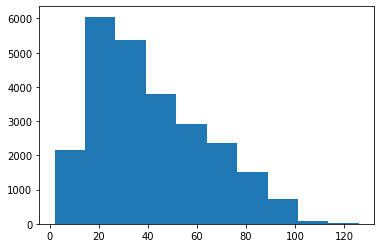

In [109]:
plt.hist(seq_lens)
plt.show()

In [110]:
maxlen = 100

In [111]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [112]:
X_train = pad_sequences(train_sequences, maxlen=maxlen)
X_test = pad_sequences(test_sequences, maxlen=maxlen)

In [113]:
X_train.shape

(25000, 100)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, \
  Dropout, GRU, LSTM

In [115]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, output_dim=32))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='rmsprop',
                   metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          320000    
                                                                 
 spatial_dropout1d_10 (Spati  (None, None, 32)         0         
 alDropout1D)                                                    
                                                                 
 lstm_8 (LSTM)               (None, None, 64)          24832     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                     

In [116]:
history_lstm = model_lstm.fit(
    X_train, train_labels, batch_size=128, validation_split=0.2,
    epochs=5
)

Epoch 1/5
157/157 [==============================] - 45s 245ms/step - loss: 0.5529 - accuracy: 0.7258 - val_loss: 0.5317 - val_accuracy: 0.7670
Epoch 2/5
157/157 [==============================] - 41s 263ms/step - loss: 0.3682 - accuracy: 0.8627 - val_loss: 0.4003 - val_accuracy: 0.8314
Epoch 3/5
157/157 [==============================] - 28s 176ms/step - loss: 0.3048 - accuracy: 0.8871 - val_loss: 0.3569 - val_accuracy: 0.8424
Epoch 4/5
157/157 [==============================] - 27s 171ms/step - loss: 0.2728 - accuracy: 0.9000 - val_loss: 0.5270 - val_accuracy: 0.8098
Epoch 5/5
157/157 [==============================] - 27s 171ms/step - loss: 0.2531 - accuracy: 0.9093 - val_loss: 0.3696 - val_accuracy: 0.8424


In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
# y_test_pred = (model_stack.predict(X_test) > 0.5).astype('int32')
# accuracy_score(y_test, y_test_pred)

# test_pred = model_lstm.predict_classes(X_test)
test_pred = (model_lstm.predict(X_test) > 0.5).astype('int32')
print(confusion_matrix(test_labels, test_pred))

[[11028  1129]
 [ 2497 10346]]


In [120]:
print(accuracy_score(test_labels, test_pred))

0.85496
